# Exploratory Data Analysis (Stage 1)
## Helin Yilmaz

#### Import Libraries to Use for Visualization, Data Processing

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# Load cleaned dataset
df = pd.read_parquet("../Data Cleaning/final_dataset.parquet")
pd.set_option('display.max_columns', None)

In [7]:
# Set Seaborn style for consistency
sns.set(style="whitegrid", palette="Set2")

#### Understanding the data

In [8]:
df.head()

,official_name,level,speakers,country,official,regional,minority,national,widely_spoken,country_count,max_urbanization,max_internet_use
0,!Xun,Vulnerable,18000,South Africa;Namibia;Angola,0,0,0,0,0,3,68.819,75.7
1,(Lower) Tanana,Critically Endangered,25,United States,0,0,0,0,0,1,83.298,93.1
2,A'ingae,Vulnerable,1500,Colombia;Ecuador,0,0,0,0,0,2,82.354,77.3
3,Aasáx,Extinct,0,Tanzania,0,0,0,0,0,1,37.409,29.1
4,Abaga,Critically Endangered,5,Papua New Guinea,0,0,0,0,0,1,13.723,24.1


In [9]:
df.tail()

,official_name,level,speakers,country,official,regional,minority,national,widely_spoken,country_count,max_urbanization,max_internet_use
2803,Thai,Not Endangered,71000000,Thailand;Viet Nam,1,3,1,0,0,2,53.608,89.5
2804,Javanese,Not Endangered,69000000,Indonesia,0,1,0,0,1,1,58.572,69.2
2805,Italian,Not Endangered,66000000,Albania;Argentina;Croatia;Eritrea;Italy;Sovere...,5,0,1,1,3,10,97.836,97.3
2806,Levantine Arabic,Not Endangered,60000000,Algeria;Bahrain;Chad;Comoros;Cyprus;Djibouti;E...,0,0,0,0,0,31,100.000,100.0
2807,Sudanese Arabic,Not Endangered,52000000,Algeria;Bahrain;Chad;Comoros;Cyprus;Djibouti;E...,0,0,0,0,0,31,100.000,100.0


#### Plot 1: Urbanization and Internet Use vs Language Endangerment
Question: Do less connected societities lose languages faster?

In [10]:
# Calculate medians for max_urbanization by level
urbanization_medians = df.groupby('level')['max_urbanization'].median()
print("Medians of Max Urbanization by Language Endangerment Level:\n", urbanization_medians)

print("\n" + "--"*50 + "\n")

# Calculate medians for max_internet_use by level
internet_use_medians = df.groupby('level')['max_internet_use'].median()
print("Medians of Max Internet Use by Language Endangerment Level:\n", internet_use_medians)

print("\n" + "--"*50 + "\n")

# To get a sense of the distribution
# For example, for urbanization:
urbanization_description = df.groupby('level')['max_urbanization'].describe()
print("Descriptive Statistics for Max Urbanization by Language Endangerment Level:\n", urbanization_description)

print("\n" + "--"*50 + "\n")

# For example, for internet use:
internet_use_description = df.groupby('level')['max_internet_use'].describe()
print("Descriptive Statistics for Max Internet Use by Language Endangerment Level:\n", internet_use_description)

Medians of Max Urbanization by Language Endangerment Level:
 level
At risk                  77.2570
Critically Endangered    83.2980
Endangered               58.5720
Extinct                  86.6170
Not Endangered           88.4965
Severely Endangered      64.5700
Threatened               58.5720
Vulnerable               59.3150
Name: max_urbanization, dtype: float64

----------------------------------------------------------------------------------------------------

Medians of Max Internet Use by Language Endangerment Level:
 level
At risk                  81.20
Critically Endangered    93.10
Endangered               69.20
Extinct                  93.10
Not Endangered           94.30
Severely Endangered      79.50
Threatened               69.20
Vulnerable               71.05
Name: max_internet_use, dtype: float64

----------------------------------------------------------------------------------------------------

Descriptive Statistics for Max Urbanization by Language Endangerment L

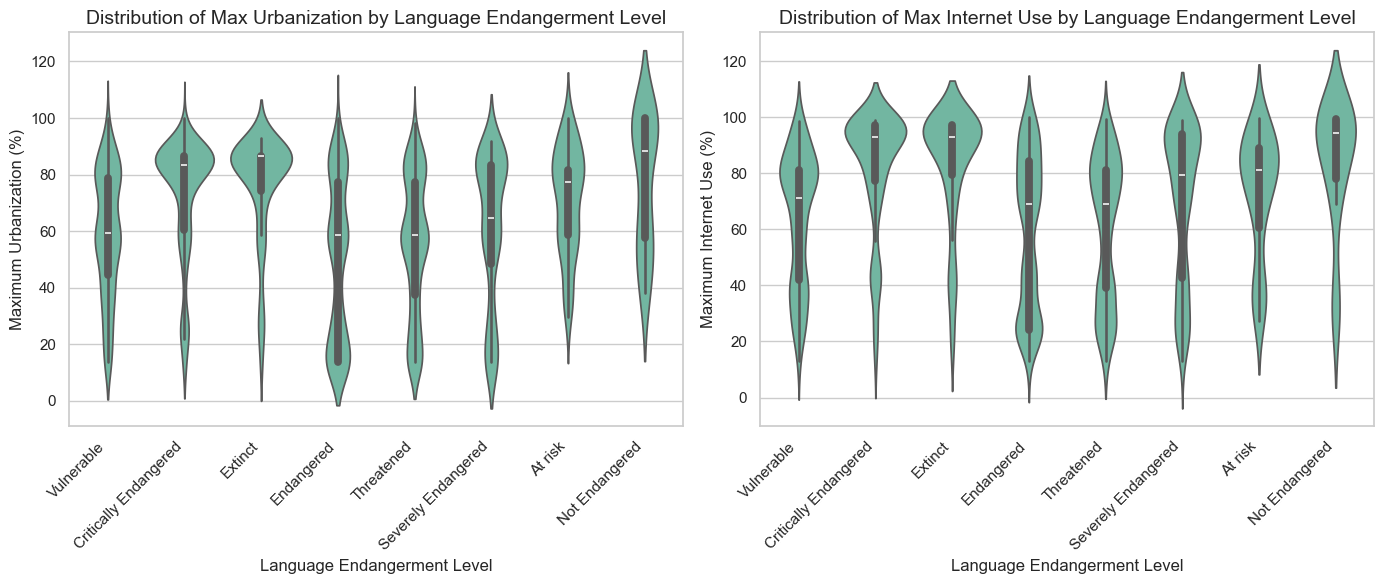

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='level', y='max_urbanization')
plt.xticks(rotation=45, ha='right') 
plt.title('Distribution of Max Urbanization by Language Endangerment Level', fontsize=14)
plt.xlabel('Language Endangerment Level', fontsize=12)
plt.ylabel('Maximum Urbanization (%)', fontsize=12) 

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='level', y='max_internet_use')
plt.xticks(rotation=45, ha='right') 
plt.title('Distribution of Max Internet Use by Language Endangerment Level', fontsize=14)
plt.xlabel('Language Endangerment Level', fontsize=12)
plt.ylabel('Maximum Internet Use (%)', fontsize=12) 

plt.tight_layout()
plt.show()

##### (Max) Urbanization
The relationship between urbanization and endangerment is not entirely straightforward, but there is a visible pattern in the medians. Not Endangered (88.5), Extinct (86.6), and Critically Endangered (83.3) languages have the highest median urbanization levels, while Endangered, Threatened, and Vulnerable languages sit lower, around 58–59. This might imply that languages spoken in more urbanized countries are either better preserved or better documented, though the inclusion of Extinct languages complicates this interpretation.

One possible explanation is that urbanization may facilitate language documentation, even after languages fall out of everyday use. While there isn’t a linear decline, the shift in medians suggests urbanization could still play a role, likely interacting with other factors like policy, education, or community efforts.

##### (Max) Internet Use
Languages that are Not Endangered, Extinct, and Critically Endangered tend to have the highest median internet use (all around 93–94). In contrast, categories like Endangered, Threatened, and Vulnerable show lower medians, ranging from about 69 to 71. This suggests that greater internet connectivity may be linked to better documentation or preservation efforts, particularly in contexts where the language is already under threat but not yet lost. Interestingly, Extinct languages often show high internet access, which may reflect digital preservation in countries with supporting infrastructure.

Overall, the data suggests a complex relationship between these factors and language endangerment. While 'Endangered,' 'Threatened,' and 'Severely Endangered' languages tend to be in less urbanized and less internet-connected regions, 'Critically Endangered' and 'Extinct' languages surprisingly show high median urbanization and internet use. This indicates that factors beyond just urbanization or internet access, such as specific socio-cultural dynamics, community policies, or historical events, play crucial roles in the ultimate survival or extinction of a language, especially in highly connected environments.

#### Plot 2: Speaker Count vs Internet Use
Question: Is tech access correlated with speaker retention?

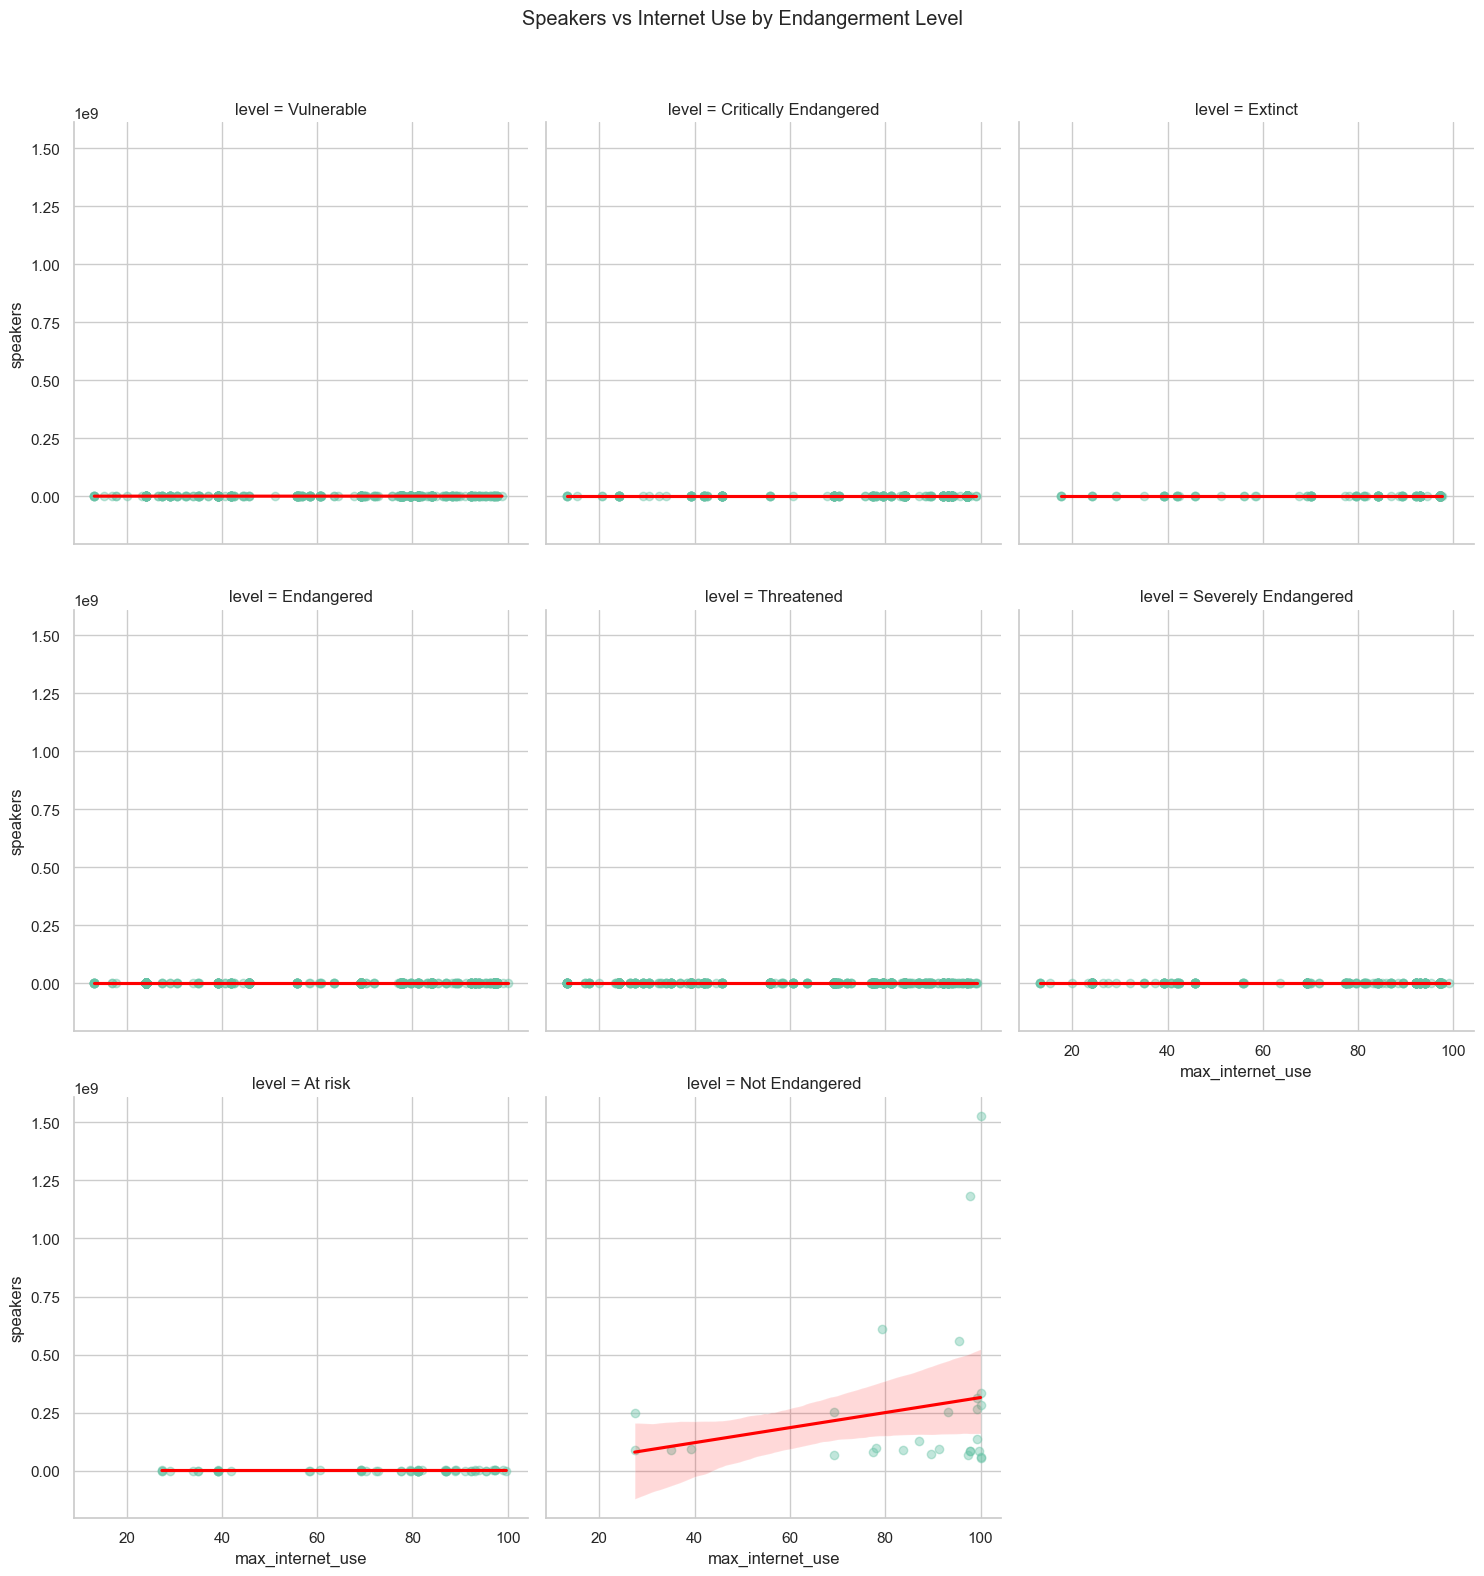

In [12]:
sns.lmplot(data=df, x='max_internet_use', y='speakers', col='level',
           col_wrap=3, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.suptitle('Speakers vs Internet Use by Endangerment Level', y=1.05)
plt.show()

The plot suggests that while internet access does not show a clear correlation with speaker count for most endangerment levels, there is a slight positive relationship for Not Endangered languages. This may indicate that high speaker retention often coexists with high tech access. However, for languages already experiencing endangerment, increasing internet access alone does not appear to correspond with higher speaker counts, suggesting that technology may support preservation efforts, but is not sufficient on its own to reverse language decline.

#### Plot 3: Country Count vs. Endangerment
Question: Are languages that are spoken in more places less at risk?

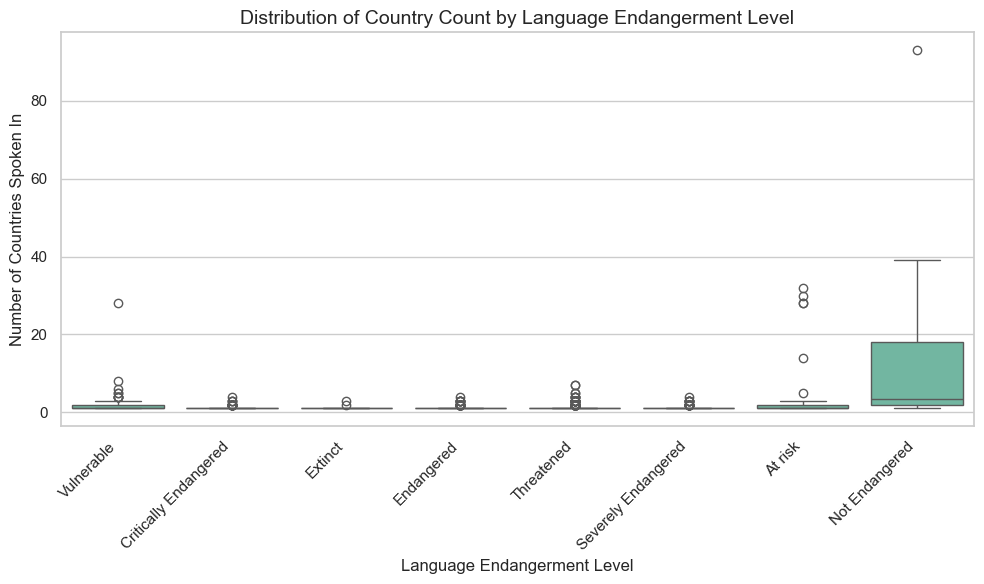

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='level', y='country_count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Country Count by Language Endangerment Level', fontsize=14)
plt.xlabel('Language Endangerment Level', fontsize=12)
plt.ylabel('Number of Countries Spoken In', fontsize=12)
plt.tight_layout()
plt.show()

This plot clearly shows that languages classified as Not Endangered are spoken in significantly more countries than those in other endangerment categories. They also exhibit a wider distribution and several high outliers. In contrast, languages across the spectrum from Vulnerable to At Risk (including Extinct) are overwhelmingly spoken in just one or two countries, with only a few exceptions.
The data strongly suggests a positive correlation between geographic spread and language vitality, as languages spoken in more places appear to be less at risk of endangerment.

#### Plot 4: Language Status Flags vs. Endangerment
Question: Are politically recognized languages more secure?

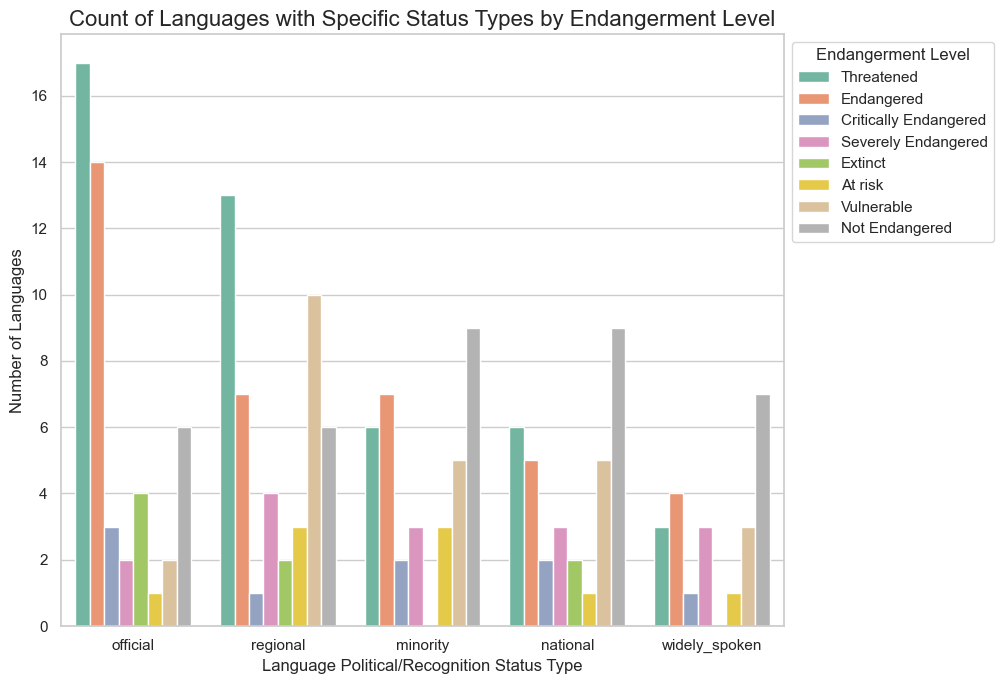

In [14]:
status_cols = ['official', 'regional', 'minority', 'national', 'widely_spoken']
df_melted = df.melt(id_vars='level', value_vars=status_cols,
                    var_name='status_type', value_name='has_status')

plt.figure(figsize=(12, 7))
sns.countplot(data=df_melted[df_melted['has_status'] == 1],
              x='status_type', hue='level')

plt.title('Count of Languages with Specific Status Types by Endangerment Level', fontsize=16)
plt.xlabel('Language Political/Recognition Status Type', fontsize=12)
plt.ylabel('Number of Languages', fontsize=12)

plt.legend(title='Endangerment Level', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Official languages have the highest overall count, particularly within the Threatened category, with over 17 languages. This suggests that many officially recognized languages are still at risk of endangerment. Regional languages follow, with a strong presence in the Threatened category and a more balanced spread across other levels. Minority and National languages are more evenly distributed across endangerment levels, though fewer are found in the Not Endangered category. In contrast, Widely Spoken languages are largely concentrated in the Not Endangered and Vulnerable groups, with few appearing in higher-risk categories, which reinforces the idea that broad usage contributes to language resilience.

This plot indicates that political recognition does not automatically protect a language from endangerment, implying its role is more nuanced and likely interacts with other factors to influence a language's security.

#### Plot 5: Speaker Count by Level
Question: Are there potential thresholds with 'Speaker Count' that correlate with Endangerment?

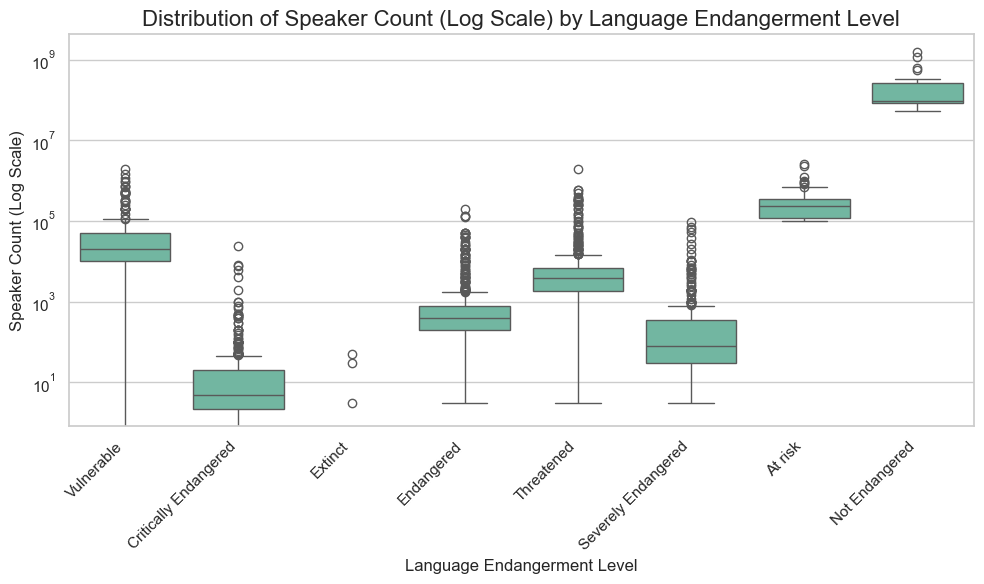

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='level', y='speakers')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Speaker Count (Log Scale) by Language Endangerment Level', fontsize=16)
plt.xlabel('Language Endangerment Level', fontsize=12)
plt.ylabel('Speaker Count (Log Scale)', fontsize=12)
plt.tight_layout()
plt.show()

This plot strongly suggests that speaker count is a significant factor in language endangerment, indicating clear thresholds. 'Not Endangered' languages exist at a distinctly higher speaker count, typically in the tens of millions to billions, separating them sharply from all other categories. Languages classified as 'At Risk' and 'Vulnerable' also show higher speaker counts (median in the thousands to hundreds of thousands) compared to 'Endangered', 'Threatened', 'Severely Endangered', and 'Critically Endangered' languages, whose speaker counts are generally much lower, often in the hundreds or low thousands, reflecting distinct thresholds of their security.

#### Plot 6: 
Question: Can languages cluster naturally into groups based on features?

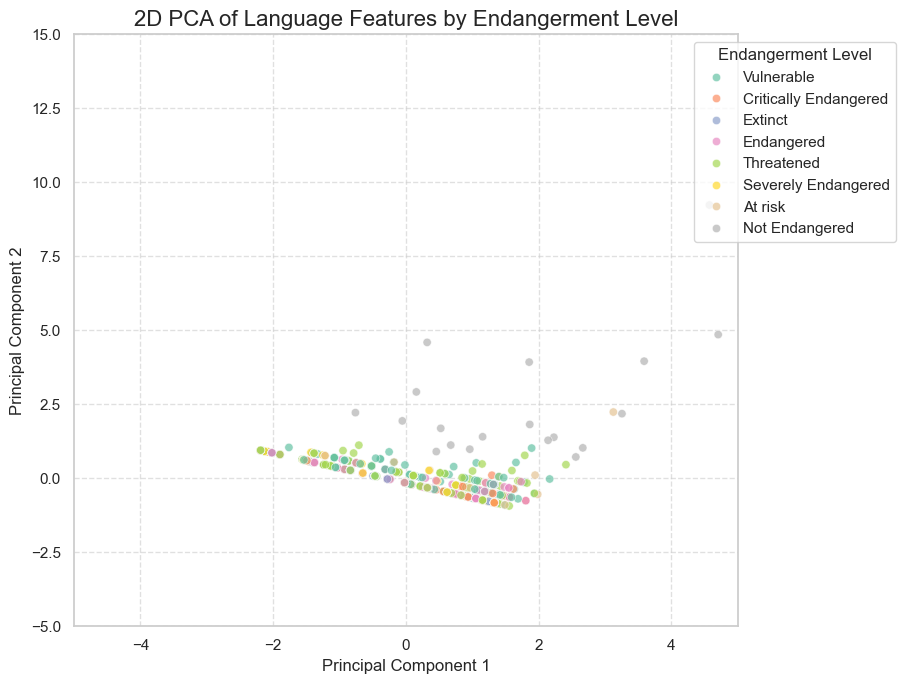

In [16]:
features = ['speakers', 'max_urbanization', 'max_internet_use', 'country_count']
X = StandardScaler().fit_transform(df[features])
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='level', alpha=0.7)

plt.title('2D PCA of Language Features by Endangerment Level', fontsize=16) 
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)


plt.xlim(-5, 5) 
plt.ylim(-5, 15)

plt.legend(title='Endangerment Level', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.95, 1])

plt.show()

The zoomed-in PCA plot shows that 'Not Endangered' languages tend to be broadly separate from the other groups, mostly outside this focused view. However, among the endangered and extinct categories, there is no clear separation into distinct sub-clusters. Instead, these groups largely overlap and cluster near the origin. This indicates that, based on the two principal components that are derived from features like speaker count, urbanization, internet use, and country count, languages tend to fall into two main categories: a "not endangered" group that is more distinct, and a large, overlapping "endangered/extinct" group. Within this latter group, different levels of endangerment are not clearly separated, suggesting that these features alone do not strongly distinguish between the various endangered statuses.